# Importamos las librerias necesarias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq

# Configuración de estilo para gráficos

In [3]:
sns.set(style="whitegrid")

# Inicializar Spark

In [4]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Cargar archivos y visualización de información general

In [5]:
table = pq.read_table("/content/transactions.parquet")
transactions = table.to_pandas()

In [20]:
print(" Primeras filas de transacciones:")
print(transactions.head())

print("\nℹ️ Información general de transactions:")
print(transactions.info())

 Primeras filas de transacciones:
       t_dat                                        customer_id  article_id  \
0 2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1 2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2 2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3 2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4 2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2  

ℹ️ Información general de transactions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object 

# Leer clientes y artículos

In [7]:
customers = pd.read_csv("/content/customers.csv")
articles = pd.read_csv("/content/articles.csv")

# Preparar datos

In [8]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

# Calcular CLV (Customer Lifetime Value)

Suma de precio total por cliente

In [9]:
clv = transactions.groupby('customer_id')['price'].sum().reset_index()
clv.rename(columns={'price':'CLV'}, inplace=True)

Unimos la información de clientes 

In [19]:
clv_full = clv.merge(customers, on='customer_id', how='left')

print("\n Primeras filas de CLV por cliente:")
print(clv_full.head())


 Primeras filas de CLV por cliente:
                                         customer_id       CLV   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.648983  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  2.601932  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0.704780  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  0.060983  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  0.469695  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  6

# Estadísticas descriptivas del CLV

In [ ]:
print("\n Estadísticas del CLV:")
print(clv_full['CLV'].describe())


 Estadísticas del CLV:
count    1.362281e+06
mean     6.493858e-01
std      1.197582e+00
min      7.627119e-04
25%      8.806780e-02
50%      2.455932e-01
75%      7.011864e-01
max      5.767641e+01
Name: CLV, dtype: float64


In [17]:
print("\n Top 10 clientes por CLV:")
print(clv_full.sort_values(by='CLV', ascending=False).head(10))


 Top 10 clientes por CLV:
                                               customer_id        CLV   FN  \
1011710  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...  57.676407  NaN   
885174   a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...  50.921186  1.0   
20162    03d0011487606c37c1b1ed147fc72f285a50c05f00b971...  49.967169  1.0   
133564   191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f464...  47.682017  1.0   
962395   b4db5e5259234574edfff958e170fe3a5e13b6f146752c...  47.662000  1.0   
578832   6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2...  47.247797  1.0   
1283457  f137c16fd175271922dad4006565503952f24750a57388...  41.688661  1.0   
1242262  e97c3a6c680cd3569df10f901a61fdffaf8f70300f6adf...  41.482051  1.0   
714142   863f0e03da282ae32a76775ce55d8a4605a85c84a26066...  41.414102  NaN   
1090960  cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...  41.327051  1.0   

         Active club_member_status fashion_news_frequency   age  \
1011710     NaN             ACTIVE             

# Gráficos de CLV

Histograma de CLV

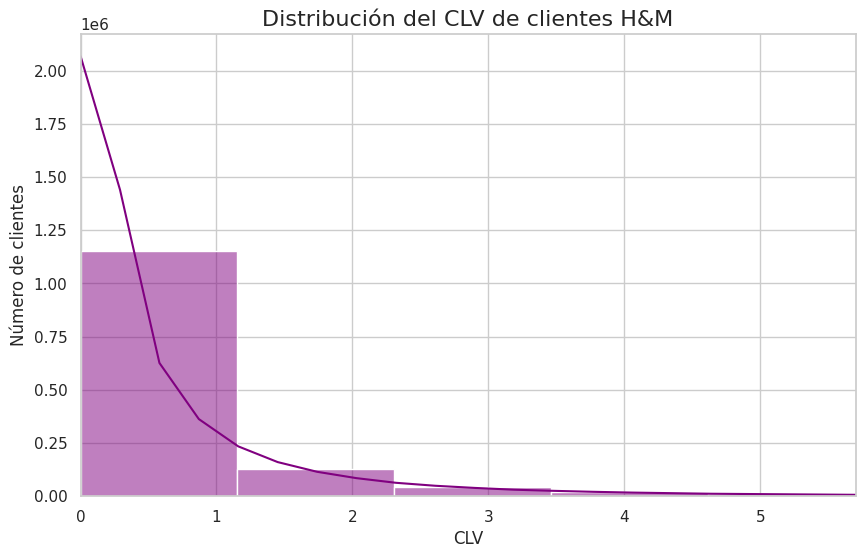

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(clv_full['CLV'], bins=50, kde=True, color='purple')
plt.title("Distribución del CLV de clientes H&M", fontsize=16)
plt.xlabel("CLV")
plt.ylabel("Número de clientes")
plt.xlim(0, clv_full['CLV'].quantile(0.99))  # Limitar outliers
plt.show()

Top 20 clientes por CLV

/tmp/ipython-input-2070395455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CLV', y='customer_id', data=top20, palette='viridis')


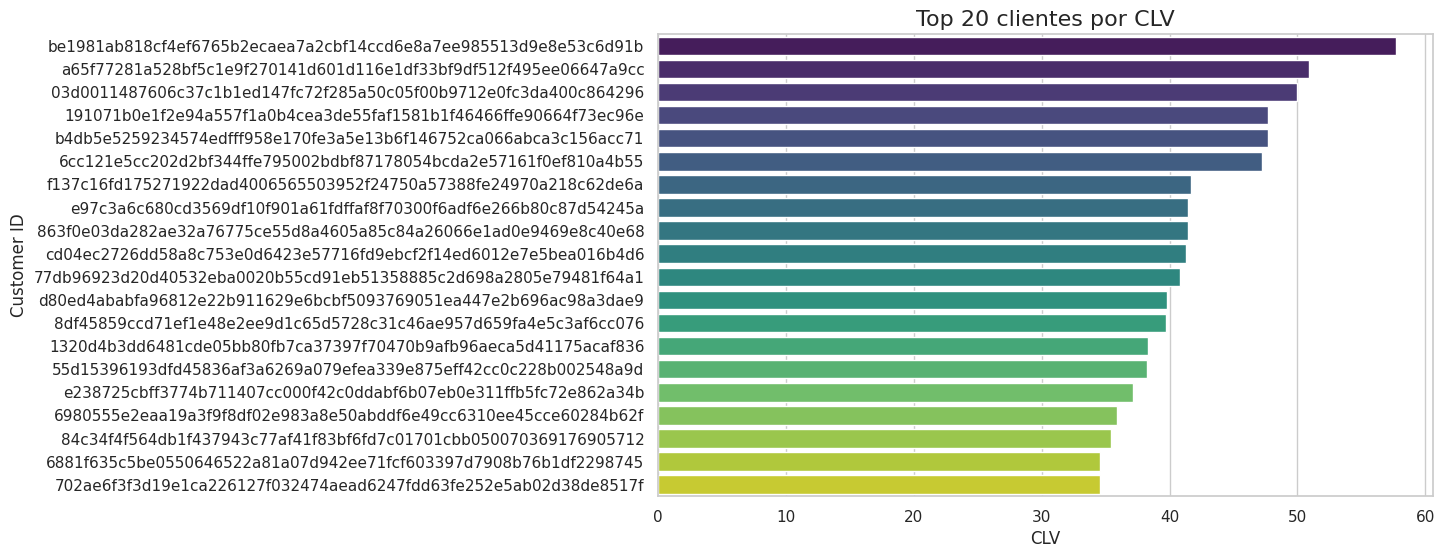

In [16]:
top20 = clv_full.sort_values(by='CLV', ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(x='CLV', y='customer_id', data=top20, palette='viridis')
plt.title("Top 20 clientes por CLV", fontsize=16)
plt.xlabel("CLV")
plt.ylabel("Customer ID")
plt.show()